In [182]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

In [183]:
x1=np.random.normal(25,5,1000) # gauss dağılımı 25 ortalmaya sahip, 5 sigmaya sahip 1000 değer üret
y1=np.random.normal(25,5,1000)
#class2
x2=np.random.normal(55,5,1000)
y2=np.random.normal(60,5,1000)
#class3
x3=np.random.normal(55,5,1000) 
y3=np.random.normal(15,5,1000)

In [184]:
x=np.concatenate((x1,x2,x3),axis=0)

In [185]:
y=np.concatenate((y1,y2,y3),axis=0)

In [186]:
dict={"x":x,"y":y}

In [187]:
df=pd.DataFrame(dict)

In [188]:
df

,x,y
0,20.518930,23.018413
1,17.568186,24.741210
2,21.710715,23.568432
3,28.317843,19.259960
4,26.275278,18.842759
...,...,...
2995,46.761299,16.960904
2996,48.436724,16.586044
2997,59.334455,23.758031
2998,55.649315,23.287257


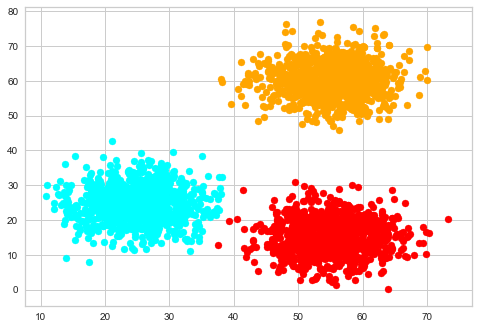

In [201]:
plt.scatter(x1,y1,color="cyan")
plt.scatter(x2,y2,color="orange")
plt.scatter(x3,y3,color="red")

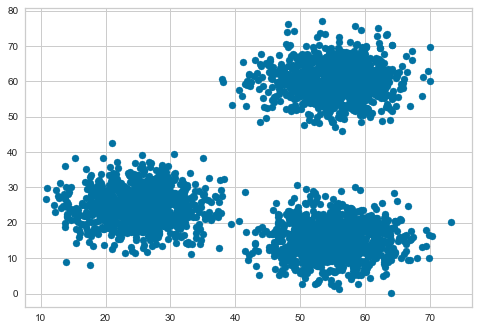

In [202]:
plt.scatter(x,y)

### Model

In [203]:
kmeans=KMeans(n_clusters=4)

In [204]:
k_fit=kmeans.fit(df)

In [205]:
k_fit.cluster_centers_  # k farklı kümenin merkezinde yer alan gözlemler

array([[55.11514013, 60.2703543 ],
       [24.93032281, 24.78807662],
       [59.68103341, 15.20833464],
       [51.14907376, 15.42101112]])

In [206]:
k_fit.labels_#elimizdeki veri setinin içinde bulunan gözlem birimlerinin hangi clusterlara ait olduğu bilgisi

array([1, 1, 1, ..., 2, 2, 2])

In [207]:
#görselleştirme

In [208]:
kumeler=k_fit.labels_

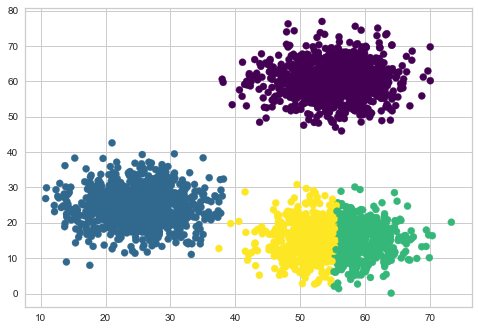

In [209]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler,s=50,cmap="viridis");

In [210]:
merkezler=k_fit.cluster_centers_

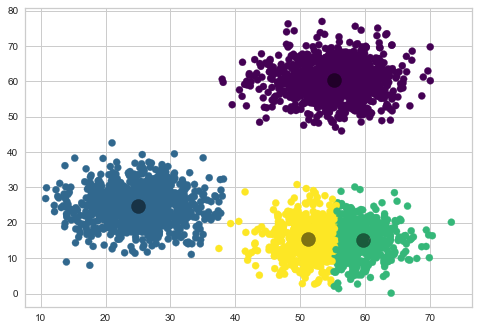

In [211]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler,s=50,cmap="viridis");
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=200,alpha=0.5);

### Optimum Küme Sayısı Belirleme - Elbow Yöntemi

In [212]:
wcss=[]
K=np.arange(1,20)
for k in K:
    k_fit=KMeans(n_clusters=k).fit(df)
    wcss.append(k_fit.inertia_) # her bir k için wcss hatası

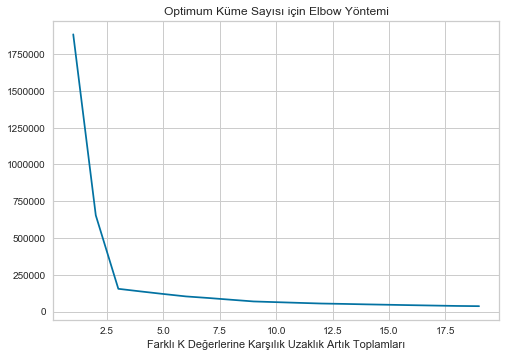

In [213]:
plt.plot(K,wcss,"bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme Sayısı için Elbow Yöntemi")
plt.show();

In [214]:
# görselleştirmenin otomatikleşririlmesi
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

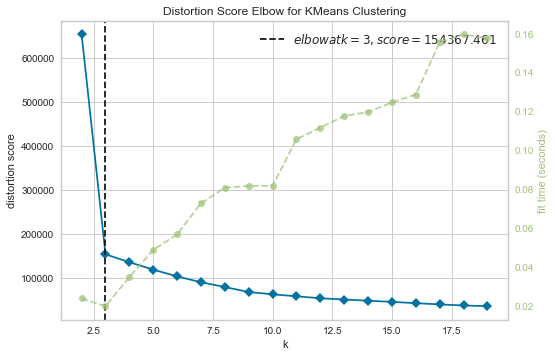

In [215]:
kmeans=KMeans()
visu=KElbowVisualizer(kmeans,k=(2,20)) # 20 ile 2 arasındaki kümeleri denemiş olucak
visu.fit(df)
visu.poof();
# optimum küme sayısını 3 olarak vermiş

In [216]:
#final modeli
kmeans=KMeans(n_clusters=3).fit(df)
kumeler=kmeans.labels_

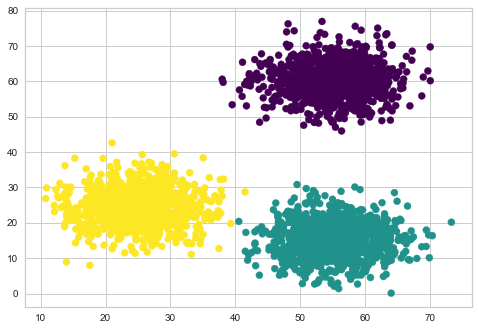

In [217]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler,s=50,cmap="viridis")

In [218]:
merkezler=kmeans.cluster_centers_
merkezler

array([[55.11514013, 60.2703543 ],
       [55.1380377 , 15.30738409],
       [24.97361748, 24.77504413]])

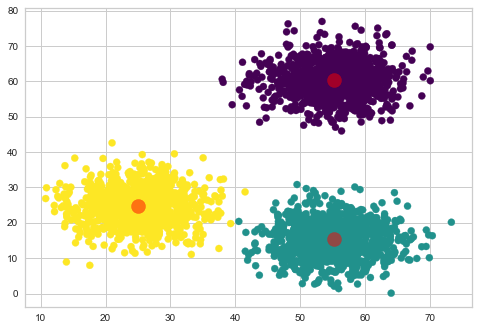

In [219]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler,s=50,cmap="viridis")
plt.scatter(merkezler[:,0],merkezler[:,1],c="red",s=200,alpha=0.5)

In [220]:
df["Kume_no"]=kumeler

In [221]:
df.iloc[1:1005]

,x,y,Kume_no
1,17.568186,24.741210,2
2,21.710715,23.568432,2
3,28.317843,19.259960,2
4,26.275278,18.842759,2
5,19.963042,22.279975,2
...,...,...,...
1000,64.074254,70.197654,0
1001,55.407511,56.801995,0
1002,45.051761,56.862275,0
1003,49.509846,52.089775,0
